# Lab 1: Linear Regression and Overfitting

### Machine Learning and Pattern Recognition, September 2016

* The lab exercises should be made in groups of two people.
* The deadline is sunday September 25, 23:59.
* Assignment should be sent to your teaching assistant. The subject line of your email should be "\#lab\_lastname1\_lastname2\_lastname3".
* Put your and your teammates' names in the body of the email
* Attach the .IPYNB (IPython Notebook) file containing your code and answers. Naming of the file follows the same rule as the subject line. For example, if the subject line is "lab01\_Kingma\_Hu", the attached file should be "lab01\_Kingma\_Hu.ipynb". Only use underscores ("\_") to connect names, otherwise the files cannot be parsed.
* Make sure we can run your notebook / scripts!

Notes on implementation:

* You should write your code and answers in this IPython Notebook: http://ipython.org/notebook.html. If you have problems, please contact your teaching assistant.
* Please write your answers right below the questions.
* Among the first lines of your notebook should be "%pylab inline". This imports all required modules, and your plots will appear inline.
* Refer to last week's lab notes, i.e. http://docs.scipy.org/doc/, if you are unsure about what function to use. There are different correct ways to implement each problem!
* For this lab, your regression solutions should be in closed form, i.e., should not perform iterative gradient-based optimization but find the exact optimum directly.

$\newcommand{\bPhi}{\mathbf{\Phi}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\bt}{\mathbf{t}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bm}{\mathbf{m}}$
$\newcommand{\bS}{\mathbf{S}}$
$\newcommand{\bI}{\mathbf{I}}$

## Part 1: Polynomial Regression

In [1]:
%matplotlib inline
%pylab inline
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import cm as cm
from matplotlib import mlab as ml

from pylab import *
from pprint import pprint

Populating the interactive namespace from numpy and matplotlib


### 1.1. Generate sinusoidal data (5 points)
Write a method `gen_sinusoidal(N)` that generates toy data like in fig 1.2 of Bishop's book. The method should have a parameter $N$, and should return $N$-dimensional vectors $\bx$ and $\bt$, where $\bx$ contains evenly spaced values from 0 to (including) 2$\pi$, and the elements $t_i$ of $\bt$ are distributed according to:

$$t_i \sim \mathcal{N}(\mu_i, \sigma^2)$$

where $x_i$ is the $i$-th elements of $\bf{x}$, the mean $\mu_i = sin(x_i)$ and the standard deviation $\sigma = 0.2$.


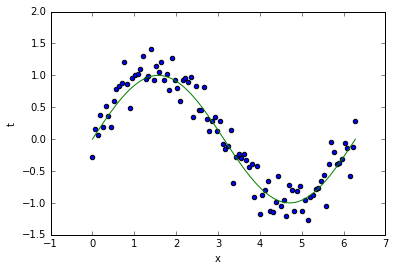

In [2]:
def gen_sinusoidal(N):
    sigma = 0.2
    x = linspace(0, 2*pi, N)
    mu = sin(x)
    t = np.random.normal(mu, sigma)
    x = np.reshape(x, (N, -1))
    t = np.reshape(t, (N, -1))
    return(x,t)

(x,t) = gen_sinusoidal(100)

plot(x,sin(x),'g')
scatter(x, t)
xlabel('x')
ylabel('t')
show()

### 1.2 Polynomial regression (15 points)

Write a method `fit_polynomial(x, t, M)` that finds the maximum-likelihood solution of an _unregularized_ $M$-th order polynomial for some dataset `x`. The error function to minimize w.r.t. $\bw$ is:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt)$

where $\bPhi$ is the _feature matrix_ (or _design matrix_) as explained in Bishop's book at section 3.1.1, $\bt$ is the vector of target values. Your method should return a vector $\bw$ with the maximum-likelihood parameter estimates. 

In [3]:
def gen_design_matrix(x, M):
    M = M + 1
    Phi = np.ones((len(x),1))
    if M == 1:
        return Phi
    for i in linspace(1, M-1, M-1):
        Phi = np.concatenate((Phi, np.power(x, i)), axis=1)
    return Phi

def fit_polynomial(x, t, M): 
    # Generate design matrix
    Phi = gen_design_matrix(x, M)
    
    # Calculate ML estimator
    w = dot(np.linalg.pinv(Phi), t)
    
    # Calculate error function
    temp = dot(Phi, w) - t
    E = 0.5*dot(temp.T, temp)
    
    return(w, E[0,0])

# Usage: (w, E) = fit_polynomial(x,t,2)


## 1.3 Plot (5 points)
Sample a dataset with $N=9$, and fit four polynomials with $M \in (0, 1, 3, 9)$.
For each value of $M$, plot the prediction function, along with the data and the original sine function. The resulting figure should look similar to fig 1.4 of the Bishop's book. Note that you can use matplotlib's `plt.pyplot(.)` functionality for creating grids of figures.

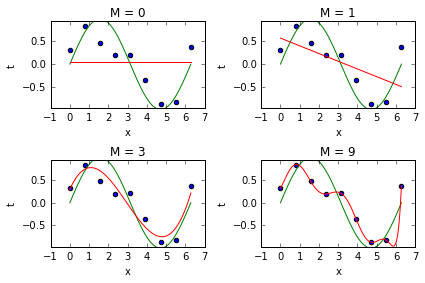

In [4]:
x_plot = linspace(0, 2*pi, 100)
(x,t) = gen_sinusoidal(9)
M_set = [0, 1, 3, 9]

for i in range(len(M_set)):
    (w, E) = fit_polynomial(x, t, M_set[i])
    subplot(sqrt(len(M_set)), sqrt(len(M_set)), i+1)
    plot(x_plot, sin(x_plot), 'g')
    tight_layout()
    xlabel('x')
    ylabel('t')
    scatter(x, t)
    plot(x_plot, dot(gen_design_matrix(reshape(x_plot, (100, -1)), M_set[i]), w), 'r')
    title('M = '+str(M_set[i]))
    pylab.ylim([min(t)-0.1, max(t)+0.1])

show()


### 1.4 Regularized linear regression (10 points)

Write a method `fit_polynomial_reg(x, t, M, lamb)` that fits a _regularized_ $M$-th order polynomial to the sinusoidal data, as discussed in the lectures, where `lamb` is the regularization term _lambda_. (Note that 'lambda' cannot be used as a variable name in Python since it has a special meaning). The error function to minimize w.r.t. $\bw$:

$E(\bw) = \frac{1}{2} (\bPhi\bw - \bt)^T(\bPhi\bw - \bt) + \frac{\lambda}{2} \mathbf{w}^T \mathbf{w}$

For background, see section 3.1.4 of Bishop's book.

In [5]:
def fit_polynomial_reg(x, t, M, lamb):
    # Generate design matrix
    Phi = gen_design_matrix(x, M)
    
    # Calculate ML estimator
    w = dot(np.linalg.inv(lamb * identity(M+1) + dot(Phi.T, Phi)), dot(Phi.T, t))
    
    # Calculate error function
    temp = dot(Phi, w) - t
    E = 0.5 * dot(temp.T, temp) + 0.5 * lamb * dot(w.T, w)
    
    return(w, E[0,0])

# Usage: (w,E) = fit_polynomial_reg(x, t, 2, 0.1)






### 1.5 Model selection by cross-validation (10 points)
Use cross-validation to find a good choice of $M$ and $\lambda$, given a dataset of $N=9$ datapoints generated with `gen_sinusoidal(9)`. You should write a function that tries (loops over) a reasonable range of choices of $M$ and $\lambda$, and returns the choice with the best cross-validation error. In this case you can use $K=9$ folds, corresponding to _leave-one-out_ crossvalidation.

You can let $M \in (0, 1, ..., 10)$, and let $\lambda \in (e^{-10}, e^{-9}, ..., e^{0})$.

To get you started, here's a method you can use to generate indices of cross-validation folds.

In [6]:
def kfold_indices(N, k):
    all_indices = np.arange(N,dtype=int)
    np.random.shuffle(all_indices)
    idx = np.floor(np.linspace(0,N,k+1))
    train_folds = []
    valid_folds = []
    for fold in range(k):
        valid_indices = all_indices[idx[fold]:idx[fold+1]]
        valid_folds.append(valid_indices)
        train_folds.append(np.setdiff1d(all_indices, valid_indices))
    return train_folds, valid_folds

def best_model_cv(m_range, l_range, N, k):
    
    (train_folds, valid_folds) = kfold_indices(N, k)

    cv_error = [[0 for rx in range(l_range)] for ry in range(m_range)] 
    
    tr_error = [[0 for rx in range(l_range)] for ry in range(m_range)] 

    for M in range(m_range):
        for lam in range(l_range):
            for k in range(len(train_folds)):
                (w,E) = fit_polynomial_reg(x[train_folds[k]], t[train_folds[k]], M, np.exp(-lam))
                
                tr_error[M][lam] += E
                
                #Generate design matrix
                Phi = gen_design_matrix(x[valid_folds[k]], M)

                #Calculate (unregularized) cross-validation error
                temp = dot(Phi, w) - t[valid_folds[k]]
                E = 0.5*dot(temp.T, temp)

                cv_error[M][lam] += E[0,0]

    best_err =  min(map(min, zip(*cv_error)))

    for M in range(m_range):
        if best_err in cv_error[M][:]:
            for L in range(l_range):
                if best_err == cv_error[M][L]:
                    opt_M = M
                    opt_L = L
    
    return (opt_M, opt_L, best_err, cv_error, tr_error)

# Usage: (opt_M, opt_L, best_err, cv_error, tr_error) = best_model_cv(11, 11, 9, 9)
(opt_M, opt_L, best_err, cv_error, tr_error) = best_model_cv(11, 11, 9, 9)

/home/jgalle29/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


Create a comprehensible plot of the cross-validation error for each choice of $M$ and $\lambda$. Highlight the best choice. 

/home/jgalle29/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


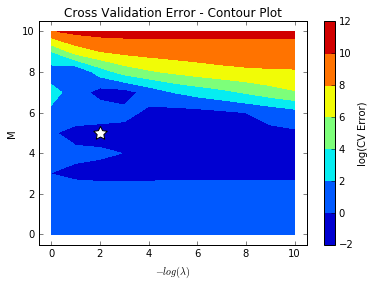

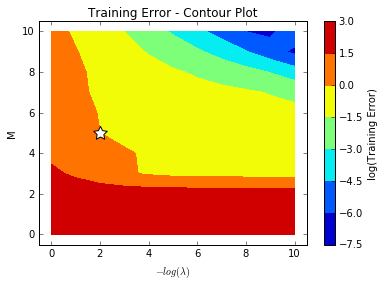

In [25]:
#Generate data and sample 9 random points
N = 9
(x, t) = gen_sinusoidal(N)

m_range = 11
l_range = 11

(opt_M, opt_L, best_err, cv_error, tr_error) = best_model_cv(m_range, l_range, N, 9)

X, Y = np.meshgrid(range(l_range), range(m_range))

plt.figure()
cp = plt.contourf(X, Y, log((cv_error)))

cbar = plt.colorbar(cp)
cbar.ax.set_ylabel('log(CV Error)')
plt.scatter(opt_L, opt_M, s=200, c='w', marker=(5, 1))
plt.title('Cross Validation Error - Contour Plot')
plt.xlabel('$-log(\lambda)$')
plt.ylabel('M')

plt.show()


plt.figure()
cp = plt.contourf(X, Y, log(tr_error))

cbar = plt.colorbar(cp)
cbar.ax.set_ylabel('log(Training Error)')
plt.scatter(opt_L, opt_M, s=200, c='w', marker=(5, 1))
plt.title('Training Error - Contour Plot')
plt.xlabel('$-log(\lambda)$')
plt.ylabel('M')

plt.show()

_Question_: Explain over-fitting and under-fitting, illuminated by your plot. Explain the relationship with model bias and model variance.

Answer: In the plot for Cross Validation Error, we observe that high validation errors are related with high values of M and low values of $\lambda$ (i.e. high values of $-\log(\lambda)$). These are the cases where the model is too complex for the data, and where the low $\lambda$ values imply little penalty for large coefficients, so that over-fitting takes place. This area corresponds to the region in which the Training Error plot is lowest, which means that the model has been (over)specifically tailored to fit the training data. Under-fitting, on the other hand, occurs when the model is too simple (low values of $M$) and is not able to capture important structures in the data. For example, the constant model with $M=0$ is not able to capture the curvature in the data. 

The bias represents the extent to which the prediction differs from the desired regression function. For this reason, it is associated with the training error. On the other hand, the variance measures the extent to which the predicted function is sensitive to the particular choice of data set, i.e., the generalization ability of the model and is associated with the validation error. In general, underfitting relates to situations in which there are high levels of both bias and variance; and overfitting regards situations in which the bias is very low but the variance is high.

### 1.6 Plot best cross-validated fit (5 points)

For some dataset with $N = 9$, plot the model with the optimal $M$ and $\lambda$ according to the cross-validation error, using the method you just wrote. Let the plot make clear which $M$ and $\lambda$ were found.

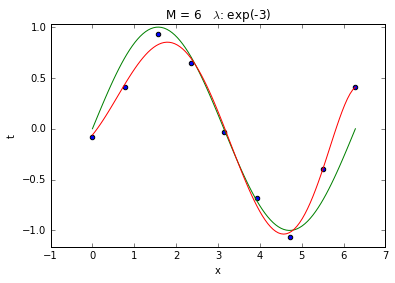

In [8]:
nx = linspace(0, 2*pi, 100)
plot(nx, sin(nx), 'g')
xlabel('x')
ylabel('t')
scatter(x, t)

(w,E) = fit_polynomial_reg(x, t, opt_M, np.exp(-opt_L))

plot(nx, dot(gen_design_matrix(np.reshape(nx, (100, -1)), opt_M), w), 'r')

title('M = '+str(opt_M)+'   $\lambda$: exp(-' + str(opt_L)+')')
pylab.ylim([min(t)-0.1, max(t)+0.1])
show()


## Part 2: Bayesian Linear (Polynomial) Regression

### 2.1 Sinusoidal data 2 (5 points)

Write a function `gen_sinusoidal2(N)` that behaves identically to `gen_sinusoidal(N)` except that the generated values $x_i$ are not linearly spaced, but drawn from a uniform distribution between $0$ and $2 \pi$.

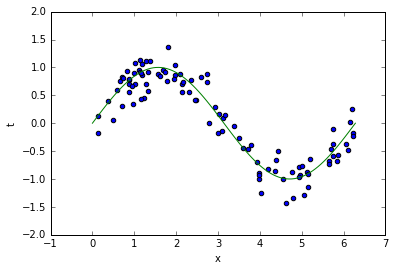

In [9]:
def gen_sinusoidal2(N):
    sigma = 0.2
    x = np.random.uniform(0, 2*pi, N)
    mu = sin(x)
    t = np.random.normal(mu, sigma)
    x = np.reshape(x, (N, -1))
    t = np.reshape(t, (N, -1))
    return(x,t)

(x,t) = gen_sinusoidal2(100)

plot(linspace(0, 2*pi, 100), sin(linspace(0, 2*pi, 100)), 'g')
scatter(x, t)
xlabel('x')
ylabel('t')
show()

### 2.2 Compute Posterior (15 points)

You're going to implement a Bayesian linear regression model, and fit it to the sinusoidal data. Your regression model has a zero-mean isotropic Gaussian prior over the parameters, governed by a single (scalar) precision parameter $\alpha$, i.e.:

$$p(\bw \;|\; \alpha) = \mathcal{N}(\bw \;|\; 0, \alpha^{-1} \bI)$$

The covariance and mean of the posterior are given by:

$$\bS_N= \left( \alpha \bI + \beta \bPhi^T \bPhi \right)^{-1} $$
$$\bm_N = \beta\; \bS_N \bPhi^T \bt$$

where $\alpha$ is the precision of the predictive distribution, and $\beta$ is the noise precision. 
See MLPR chapter 3.3 for background.

Write a method `fit_polynomial_bayes(x, t, M, alpha, beta)` that returns the mean $\bm_N$ and covariance $\bS_N$ of the posterior for a $M$-th order polynomial, given a dataset, where `x`, `t` and `M` have the same meaning as in question 1.2.

In [10]:
def fit_polynomial_bayes(x, t, M, alpha, beta):
    #Generate design matrix
    Phi = gen_design_matrix(x, M)
    
    #Calculate MAP estimators
    S = np.linalg.inv(alpha * identity(M+1) + beta * dot(Phi.T, Phi))
    m = beta * dot(S, dot(Phi.T, t))
        
    return m, S

# Usage: (m,S) = fit_polynomial_bayes(x, t, 4, 0.5, 0.5)

### 2.3 Prediction (10 points)

The predictive distribution of Bayesian linear regression is:

$$ p(t \;|\; \bx, \bt, \alpha, \beta) = \mathcal{N}(t \;|\; \bm_N^T \phi(\bx), \sigma_N^2(\bx))$$

$$ \sigma_N^2 = \frac{1}{\beta} + \phi(\bx)^T \bS_N \phi(\bx) $$

where $\phi(\bx)$ are the computed features for a new datapoint $\bx$, and $t$ is the predicted variable for datapoint $\bx$. 

Write a function that `predict_polynomial_bayes(x, m, S, beta)` that returns the predictive mean and variance given a new datapoint `x`, posterior mean `m`, posterior variance `S` and a choice of model variance `beta`.

In [11]:
def predict_polynomial_bayes(x, m, S, beta, M):
    N_samp = len(x)
    Phi = gen_design_matrix(x, M)
    pred_var = 1/beta * identity(N_samp) + dot(Phi, dot(S , Phi.T))
    
    pred_mean = dot(Phi, m)
    
    return pred_mean, pred_var

# Usage: 
# (m,S) = fit_polynomial_bayes(x,t,4,0.5,0.5)
# pred_mean, pred_var = predict_polynomial_bayes(reshape([0,0.5,1,1.5],(4,-1)),m,S,0.5,4)

### 2.4 Plot predictive distribution (10 points)

a) (5 points) Generate 7 datapoints with `gen_sinusoidal2(7)`. Compute the posterior mean and covariance for a Bayesian polynomial regression model with $M=5$, $\alpha=\frac{1}{2}$ and $\beta=\frac{1}{0.2^2}$.
Plot the Bayesian predictive distribution, where you plot (for $x$ between 0 and $2 \pi$) $t$'s predictive mean and a 1-sigma predictive variance using `plt.fill_between(..., alpha=0.1)` (the alpha argument induces transparency).

Include the datapoints in your plot.

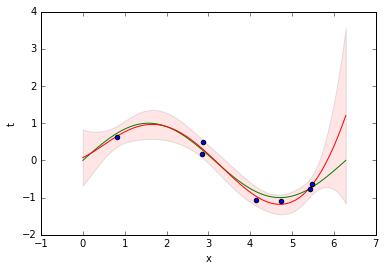

In [14]:
N = 7
M = 5
alpha = 0.5
beta = 1/(0.2**2)

(x, t) = gen_sinusoidal2(N)
m, S = fit_polynomial_bayes(x, t, M, alpha, beta)

pred_x = linspace(0, 2*pi, 100)

pred_mean, pred_var = predict_polynomial_bayes(reshape(pred_x, (100, -1)), m, S, beta, M)
pred_var = reshape(sqrt(diag(pred_var)), (100, -1))
mms = [item for sublist in pred_mean - pred_var for item in sublist]
mps = [item for sublist in pred_mean + pred_var for item in sublist]

plot(pred_x, sin(pred_x),'g')
scatter(x, t, zorder=Inf)
plot(pred_x, pred_mean,'r')
fill_between(pred_x, mms, mps, facecolor='red', alpha=0.1)

xlabel('x')
ylabel('t')
show()

b) (5 points) For a second plot, draw 100 samples from the parameters' posterior distribution. Each of these samples is a certain choice of parameters for 5-th order polynomial regression. 
Display each of these 100 polynomials.

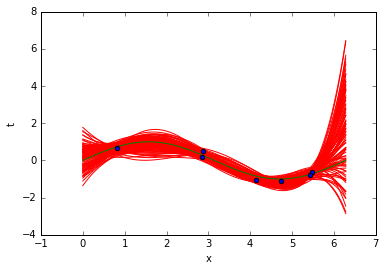

In [15]:
m_list = [item for sublist in m for item in sublist]
Phi = gen_design_matrix(reshape(pred_x, (100, -1)), M)
    
for i in range(100):
    w = np.random.multivariate_normal(m_list, S)
    plot(pred_x, dot(Phi, w), 'r')

plot(pred_x, sin(pred_x), 'g')    
scatter(x, t, zorder=Inf)
xlabel('x')
ylabel('t')
show()


### 2.5 Additional questions (10 points)

a) (5 points) Why is $\beta=\frac{1}{0.2^2}$ the best choice of $\beta$ in section 2.4?

A./ $\beta=\frac{1}{0.2^2}$ is the best choice of $\beta$ in section 2.4 because while generating the data with function `gen_sinusoidal2(N)` we use standard deviation $\sigma = 0.2$ to add Gaussian noise to the targets. With this standard deviation we have variance $\sigma^2 = 0.2^2$ and so the best precision choice becomes $\beta = \frac{1}{\sigma^2} = \frac{1}{0.2^2}$.



b) (5 points) In the case of Bayesian linear regression, both the posterior of the parameters $p(\bw \;|\; \bt, \alpha, \beta)$ and the predictive distribution $p(t \;|\; \bw, \beta)$ are Gaussian. In consequence (and conveniently), $p(t \;|\; \bt, \alpha, \beta)$ is also Gaussian (See Bishop's book section 3.3.2 and homework 2 question 4). This is actually one of the (rare) cases where we can make Bayesian predictions without resorting to approximative methods.

Suppose you have to work with some model $p(t\;|\;x,\bw)$ with parameters $\bw$, where the posterior distribution $p(\bw\;|\;\mathcal{D})$ given dataset $\mathcal{D}$ can not be integrated out when making predictions, but where you can still generate samples from the posterior distribution of the parameters. Explain how you can still make approximate Bayesian predictions using samples from the parameters' posterior distribution.


A./ It is possible to approximate Bayesian predictions following this procedure:
   * Draw S samples from the parameters' posterior distribution.
   * Compute the prediction using each of the parameter configurations sampled in the previous step.
   * Take the mean of those predictions as an approximation to a Bayesian prediction and the variance as a measure of the uncertainty of the prediction.
   
This procedure is illustrated in section 2.4 b).